In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors

In [4]:
inputFile = 'data.txt'
data = np.loadtxt(inputFile, delimiter=',')

In [9]:
X,y = data[:, :-1], data[:, -1].astype(np.int)

In [10]:
y

array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0,
       1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3,
       0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0,
       1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3,
       0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
       2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0,
       1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3,
       0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3])

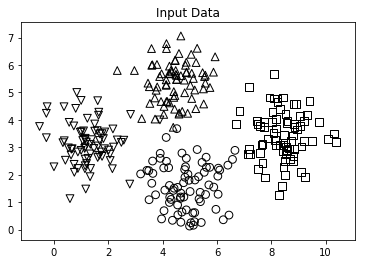

In [16]:
plt.figure()
plt.title("Input Data")

marker_shape = 'v^os'
mapper = [marker_shape[i] for i in y]

for i in range(len(mapper)):
    plt.scatter(X[i, 0], X[i, 1], marker = mapper[i], s = 60, edgecolors = 'black', facecolor = 'none')

plt.show()

In [17]:
num_neighbor = 10

size = 0.01

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1

x_values, y_values = np.meshgrid(np.arange(x_min, x_max, size), np.arange(y_min, y_max, size))

In [20]:
x_values

array([[ -1.53,  -1.52,  -1.51, ...,  11.36,  11.37,  11.38],
       [ -1.53,  -1.52,  -1.51, ...,  11.36,  11.37,  11.38],
       [ -1.53,  -1.52,  -1.51, ...,  11.36,  11.37,  11.38],
       ..., 
       [ -1.53,  -1.52,  -1.51, ...,  11.36,  11.37,  11.38],
       [ -1.53,  -1.52,  -1.51, ...,  11.36,  11.37,  11.38],
       [ -1.53,  -1.52,  -1.51, ...,  11.36,  11.37,  11.38]])

In [21]:
y_values

array([[ -1.53,  -1.53,  -1.53, ...,  -1.53,  -1.53,  -1.53],
       [ -1.52,  -1.52,  -1.52, ...,  -1.52,  -1.52,  -1.52],
       [ -1.51,  -1.51,  -1.51, ...,  -1.51,  -1.51,  -1.51],
       ..., 
       [ 11.36,  11.36,  11.36, ...,  11.36,  11.36,  11.36],
       [ 11.37,  11.37,  11.37, ...,  11.37,  11.37,  11.37],
       [ 11.38,  11.38,  11.38, ...,  11.38,  11.38,  11.38]])

In [23]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=num_neighbor)

classifier.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [24]:
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

In [25]:
output = output.reshape(x_values.shape)

In [26]:
output

array([[0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       ..., 
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3]])

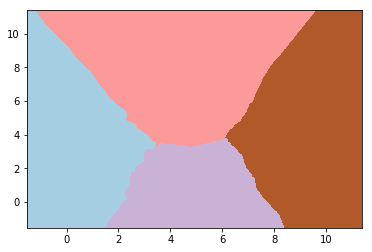

In [29]:
plt.figure()
plt.pcolormesh(x_values, y_values, output, cmap = cm.Paired)
plt.show()

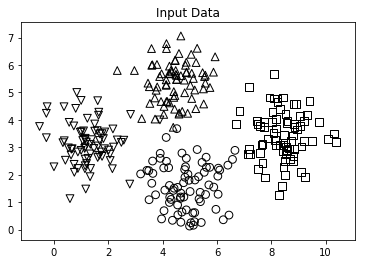

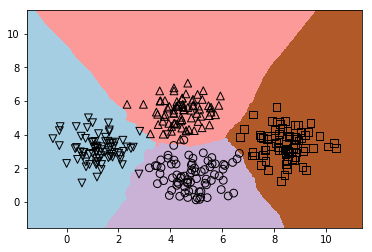

In [30]:
plt.figure()
plt.title("Input Data")

marker_shape = 'v^os'
mapper = [marker_shape[i] for i in y]

for i in range(len(mapper)):
    plt.scatter(X[i, 0], X[i, 1], marker = mapper[i], s = 60, edgecolors = 'black', facecolor = 'none')
    
    

plt.figure()
plt.pcolormesh(x_values, y_values, output, cmap = cm.Paired)

for i in range(len(mapper)):
    plt.scatter(X[i, 0], X[i, 1], marker = mapper[i], s = 60, edgecolors = 'black', facecolor = 'none')



plt.show()

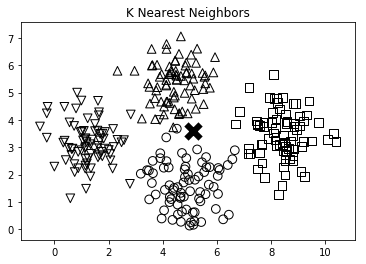

In [34]:
# Test input datapoint
test_datapoint = [5.1, 3.6]
plt.figure()
plt.title('Test datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
        linewidth=6, s=200, facecolors='black')

# Extract the K nearest neighbors
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(np.int)[0]

# Plot k nearest neighbors
plt.title('K Nearest Neighbors')
plt.show()

Predicted output: 1


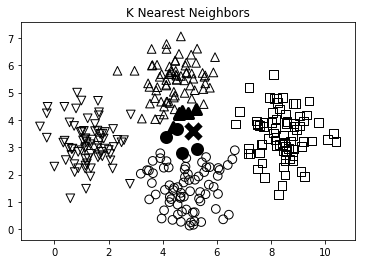

In [35]:
# Extract the K nearest neighbors
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(np.int)[0]

# Plot k nearest neighbors
plt.figure()
plt.title('K Nearest Neighbors')

for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[y[i]], 
            linewidth=3, s=100, facecolors='black')

plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
        linewidth=6, s=200, facecolors='black')

for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker=mapper[i], 
            s=75, edgecolors='black', facecolors='none')

print("Predicted output:", classifier.predict([test_datapoint])[0])

plt.show()